### Example of expected power module usage

In [1]:
import sys
import numpy as np
import pandas as pd
import datetime as dt
import pytz
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(r'C:\Users\abbey\OneDrive\Documents\Projects\WindEnergy\wind-energy-analytics')
sys.path.append(r'C:\Users\abbey\OneDrive\Documents\Projects\WindEnergy\wind-energy-analytics\scada_data_analysis')

from sklearn.metrics import mean_absolute_error, mean_squared_error
# from utils.binning_function import binning_func
# from modules.power_curve_preprocessing import PowerCurveFiltering
from modules.expected_power import ExpectedPower

### Load Data

In [2]:
train_df = pd.read_csv(r'../datasets/training_data.zip')
test_df = pd.read_csv(r'../datasets/test_data.zip')

### Data Exploration

In [3]:
train_df.shape

(151313, 138)

In [4]:
test_df.shape

(64617, 138)

### Test Expected Power Module

In [10]:
power_model = ExpectedPower(turbine_label='Wind_turbine_name', windspeed_label='Ws_avg',
                            power_label='P_avg', method='binning', kind='linear')

In [11]:
%%time
power_model = power_model.fit(train_df)

CPU times: total: 4.77 s
Wall time: 4.76 s


In [12]:
%%time
pred_df = power_model.predict(test_df)

CPU times: total: 125 ms
Wall time: 125 ms


In [13]:
pred_temp = pred_df[pred_df['Wind_turbine_name'] == 'R80721']

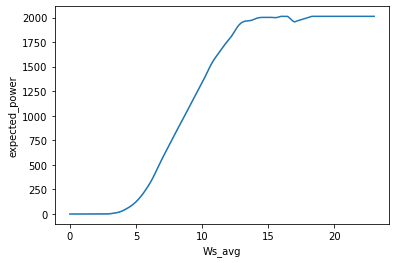

In [9]:
#linear
sns.lineplot(x=pred_temp['Ws_avg'], y=pred_temp['expected_power']);

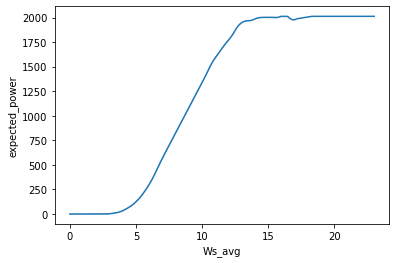

In [23]:
#quadratic
sns.lineplot(x=pred_temp['Ws_avg'], y=pred_temp['expected_power']);

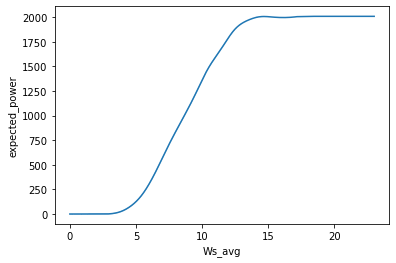

In [28]:
#cubic
sns.lineplot(x=pred_temp['Ws_avg'], y=pred_temp['expected_power']);

##### Mean absolute error metric

In [9]:
# linear
mean_absolute_error(pred_df.P_avg.values, pred_df.expected_power.values)

45.17562636015988

In [14]:
# quad
mean_absolute_error(pred_df.P_avg.values, pred_df.expected_power.values)

45.45796272651883

In [26]:
#cubic
mean_absolute_error(pred_df.P_avg.values, pred_df.expected_power.values)

45.10893142029303

##### Root mean square metric

In [34]:
#linear
mean_squared_error(pred_df.P_avg.values, pred_df.expected_power.values, squared=False)

118.90860429129623

In [16]:
#quad
mean_squared_error(pred_df.P_avg.values, pred_df.expected_power.values, squared=False)

119.09526974356719

In [27]:
#cubic
mean_squared_error(pred_df.P_avg.values, pred_df.expected_power.values, squared=False)

119.11832562094921